**Simple Notebook for exploring the data ...**

In [1]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt

import kagglegym

In [2]:
# This part is going to be for explorind the dataset ...
# so we want the entire dataset ..
with pd.HDFStore("../input/train.h5", "r") as train:
    df = train.get("train")

In [3]:
dfId = df[['id', 'timestamp', 'y']].groupby('id').agg([
                    np.min, np.max, len, 
                lambda m: (list(m)[0] - list(m)[-1])/np.abs(np.mean(list(m))) ]  ).reset_index()
dfId.sort_values([('timestamp', 'amax')], inplace=True, ascending=False)
print(dfId.head())
print(dfId['y'].columns)

       id timestamp                               y                    \
               amin  amax   len  <lambda>      amin      amax     len   
0       0       167  1812  1646 -1.662456 -0.086094  0.093498  1646.0   
891  1334         0  1812  1813 -2.000000 -0.086094  0.093498  1813.0   
902  1352         0  1812  1813 -2.000000 -0.086094  0.093498  1813.0   
901  1350         0  1812  1813 -2.000000 -0.086094  0.093498  1813.0   
900  1349      1290  1812   523 -0.336557 -0.086094  0.093498   523.0   

                   
         <lambda>  
0      -27.137033  
891    -11.179115  
902    -51.885071  
901  12468.805664  
900    -25.408518  
Index(['amin', 'amax', 'len', '<lambda>'], dtype='object')


When were the stocks bought and sole? This is interesting. It appears that the stocks are bought at regular intervals, but dropped at random times ...

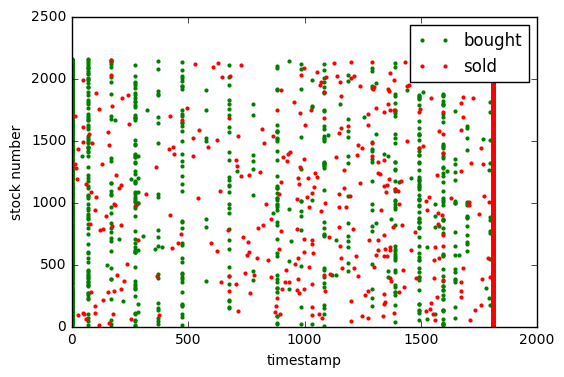

In [4]:
plt.plot(dfId[('timestamp', 'amin')], dfId['id'], '.', mfc='green', mec='None', label='bought')
plt.plot(dfId[('timestamp', 'amax')], dfId['id'], '.', mfc='red',   mec='None', label='sold')
plt.xlabel('timestamp')
plt.ylabel('stock number')
plt.legend()

Why are stocks sold at random points? Is it because the stock prices drop significantly? Let's look at the difference in the price between the start and end of a stock value when they are dropped. Are there any temporal trends in the data?

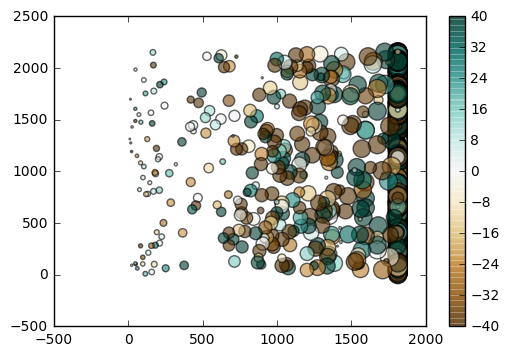

In [5]:
plt.scatter( dfId[('timestamp', 'amax')], 
             dfId['id'], 
             c    = dfId[('y', '<lambda>')], 
             s    = dfId[('timestamp', 'len')]/10,
             cmap = plt.cm.BrBG, vmin=-40, vmax=40).set_alpha(0.6)
plt.colorbar()

It does not appear as if the number to stocks that are sold is is due to the value of the stock taking a dive. 

        id         y                                        
              median       std      amin      amax      mean
62      93 -0.086094  0.069079 -0.086094  0.093498 -0.032797
954   1431 -0.057173  0.063072 -0.086094  0.093498 -0.035077
742   1118 -0.022205  0.056539 -0.086094  0.093498 -0.011848
1085  1637 -0.021048  0.057750 -0.086094  0.093498 -0.014028
849   1276 -0.020973  0.068486 -0.086094  0.093498 -0.009008
median   -0.000164
std       0.020841
amin     -0.086094
amax      0.093498
mean      0.000275
dtype: float64


/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


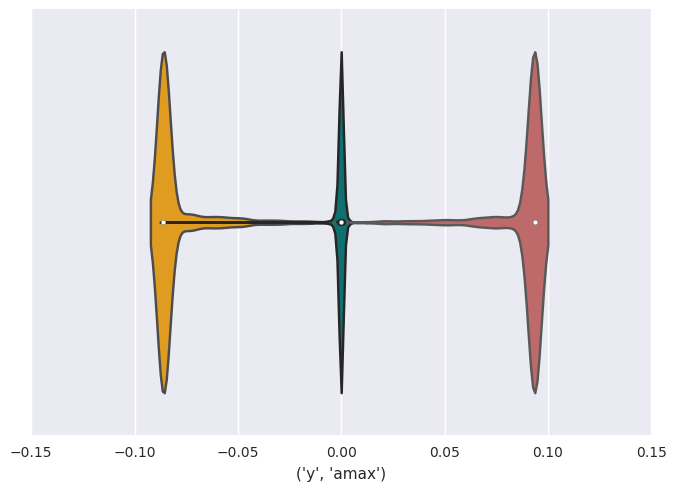

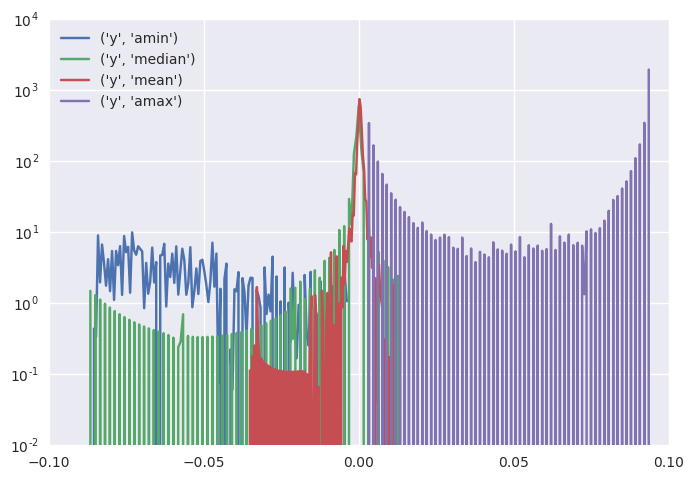

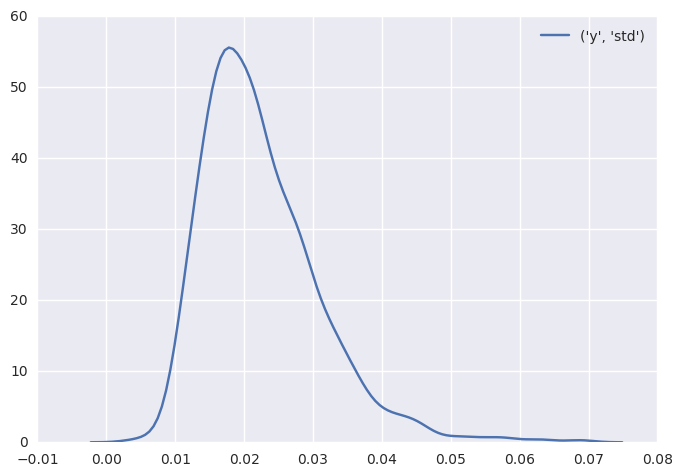

In [6]:
import seaborn as sns
dfStats = df[['y', 'id']].groupby('id').agg([np.median, np.std, np.min, np.max, np.mean]).reset_index()
dfStats.sort_values( ('y', 'median'), inplace=True )
print( dfStats.head() )
print( dfStats['y'].apply(np.median) )


sns.violinplot( dfStats[('y',  'amin')]   , color='orange')
sns.violinplot( dfStats[('y',  'median')] , color='teal')
sns.violinplot( dfStats[('y',  'amax')]   , color='indianred')


plt.figure()
temp = sns.kdeplot(dfStats[('y', 'amin')]  )
temp = sns.kdeplot(dfStats[('y', 'median')])
temp = sns.kdeplot(dfStats[('y', 'mean')]  )
temp = sns.kdeplot(dfStats[('y', 'amax')]  )
plt.yscale('log')

plt.figure()
temp = sns.kdeplot(dfStats[('y', 'std')])


/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


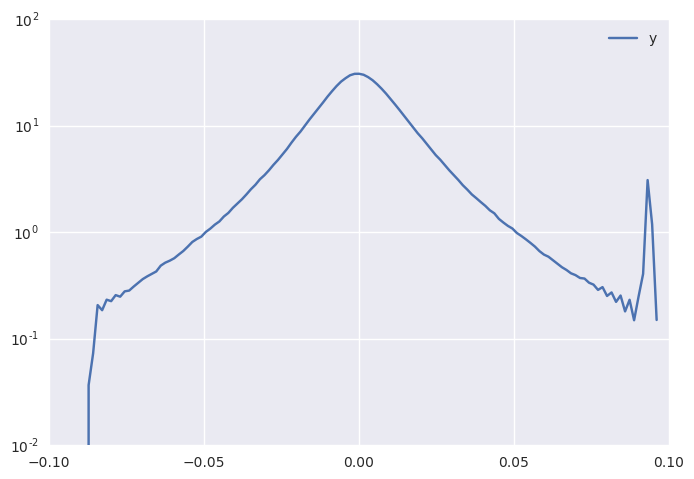

In [7]:
plt.figure()
temp = sns.kdeplot(df['y'])
plt.yscale('log')

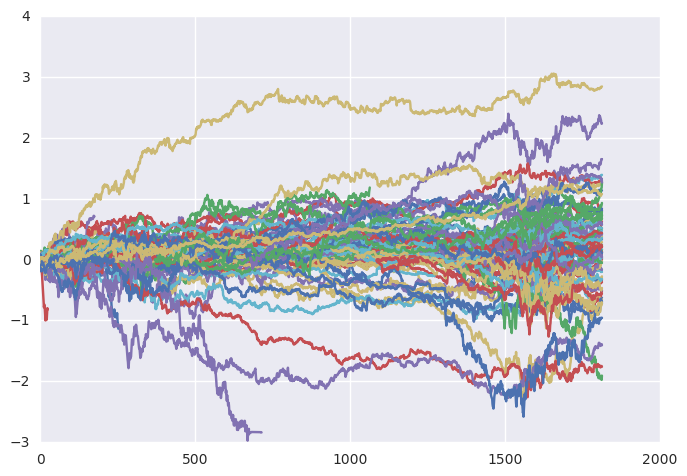

In [8]:
# Finding distributions of the result. 
# This is an entire portfolio. It will 
# be good to see how each variable changes 
# independent of each other ...
# -------------------------------------------

for i, (idVal, dfG) in enumerate(df[['id', 'timestamp', 'y']].groupby('id')):
    if i> 100: break
    df1 = dfG[['timestamp', 'y']].groupby('timestamp').agg(np.mean).reset_index()
    plt.plot(df1['timestamp'], np.cumsum(df1['y']),label='%d'%idVal)

In [9]:
# Finding distributions of the result. 
# This is an entire portfolio. It will 
# be good to see how each variable changes 
# independent of each other ...
# -------------------------------------------

for i, (idVal, dfG) in enumerate(df[['id', 'timestamp', 'y']].groupby('id')):
    if i> 100: break
    #df1 = dfG[['timestamp', 'y']].groupby('timestamp').agg(np.mean).reset_index()
    #plt.plot(df1['timestamp'], np.cumsum(df1['y']),label='%d'%idVal)
    dfG.head()

So this 'asset' is made up of other different assets. Looks like there are several assets that "track each other." One thing to do would be to try and understand which one's do and which one's don't ...

Will look more into this after work ...

In [10]:
df2 = df[['id', 'timestamp', 'y']].pivot_table(values='y', index='timestamp', columns='id').reset_index(False)
df2.head()

id,timestamp,0,6,7,10,11,12,13,14,15,...,2146,2148,2149,2150,2151,2152,2154,2155,2156,2158
0,0,NaN,NaN,NaN,-0.011753,-0.001240,-0.020940,NaN,NaN,NaN,...,0.053261,-0.015025,-0.016335,NaN,NaN,0.015117,-0.016151,NaN,-0.011723,NaN
1,1,NaN,NaN,NaN,0.005850,-0.002024,-0.020101,NaN,NaN,NaN,...,-0.014437,0.005291,-0.044970,NaN,NaN,0.003364,0.028860,NaN,0.007955,NaN
2,2,NaN,NaN,NaN,-0.000476,0.008788,0.029279,NaN,NaN,NaN,...,-0.032205,0.035890,-0.004481,NaN,NaN,0.005643,-0.001618,NaN,-0.001697,NaN
3,3,NaN,NaN,NaN,0.005212,-0.006551,0.021253,NaN,NaN,NaN,...,-0.049026,0.004440,0.014595,NaN,NaN,0.007670,0.010709,NaN,-0.008659,NaN
4,4,NaN,NaN,NaN,-0.077211,-0.004336,-0.026892,NaN,NaN,NaN,...,0.028881,-0.031858,0.008682,NaN,NaN,-0.010907,-0.002909,NaN,0.002236,NaN


Now, lets find the autocorrelations for the different id's

In [11]:
cols = [ c for c in df2.columns if str(c) != 'timestamp']
lags = [1]
aCorrs = []
for i, c in enumerate(cols):
    try:
        aCorrs.append((c , max([(df2[c].autocorr(lag)) for lag in lags])))
    except:
        pass
    
aCorrs = pd.DataFrame(aCorrs, columns=['id', 'maxAcorr']).sort_values('maxAcorr', ascending=False)
print(aCorrs.head())

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


       id  maxAcorr
357   546  0.645786
496   752  0.577709
648   980  0.494768
569   861  0.397397
880  1320  0.363540


Lets now plot the ones that have the highest autocorrelations ...

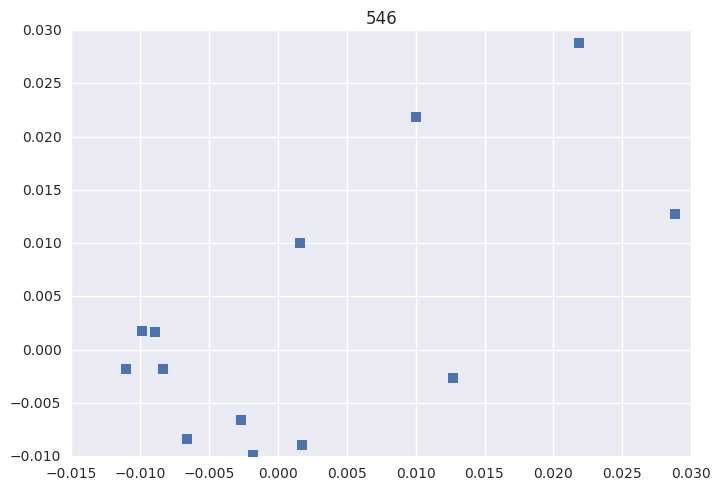

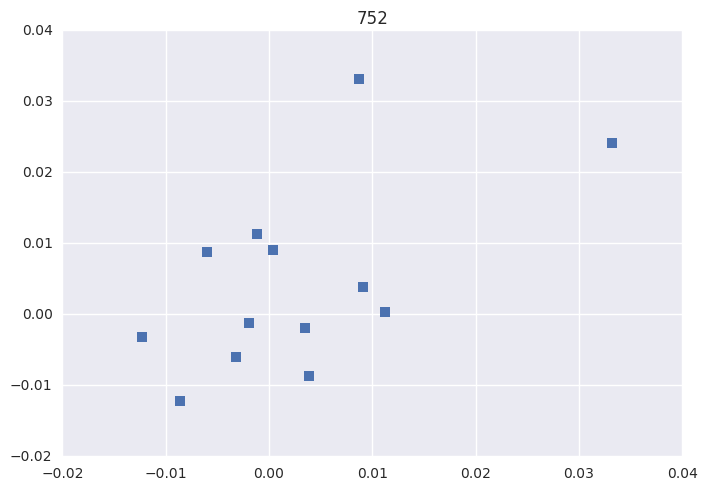

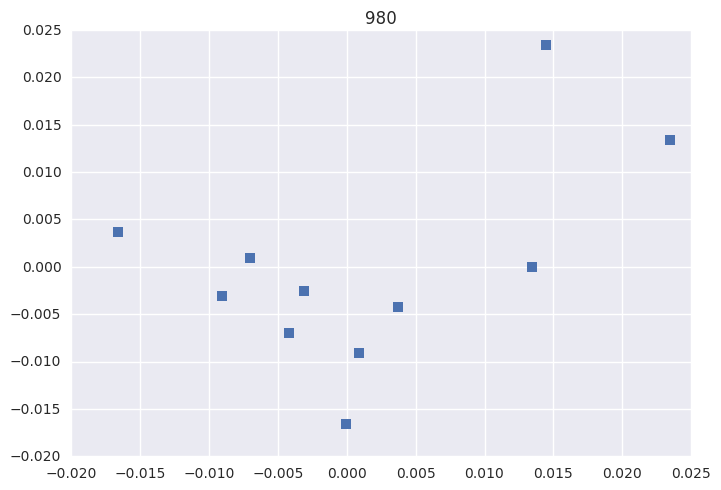

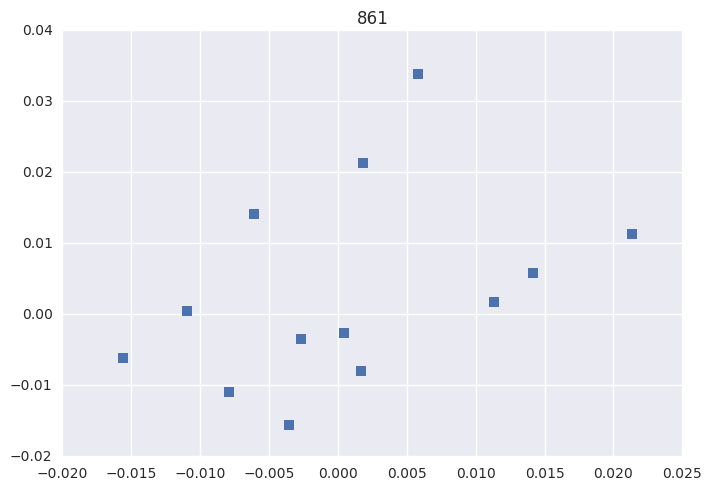

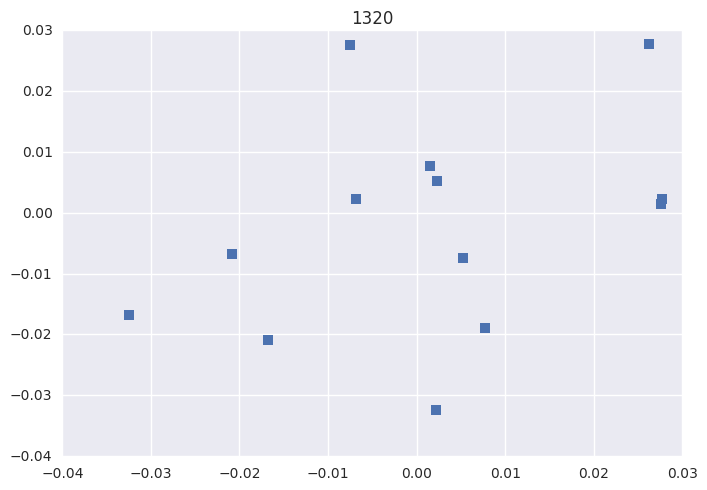

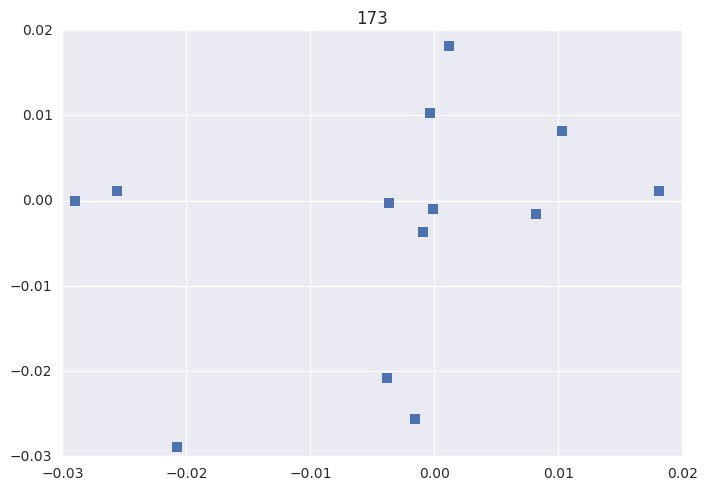

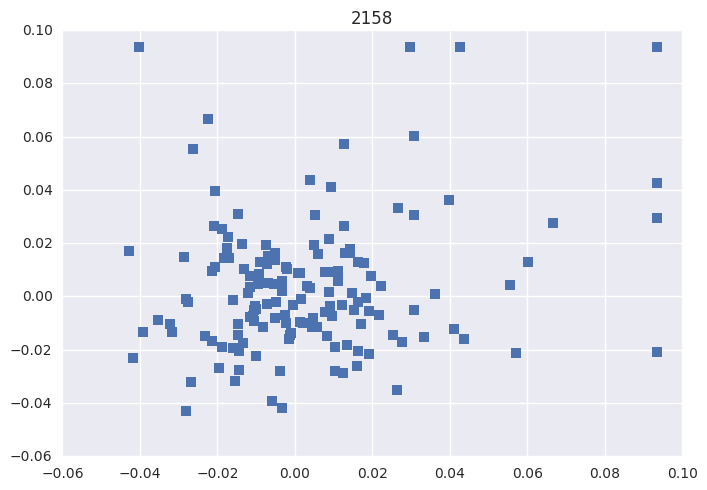

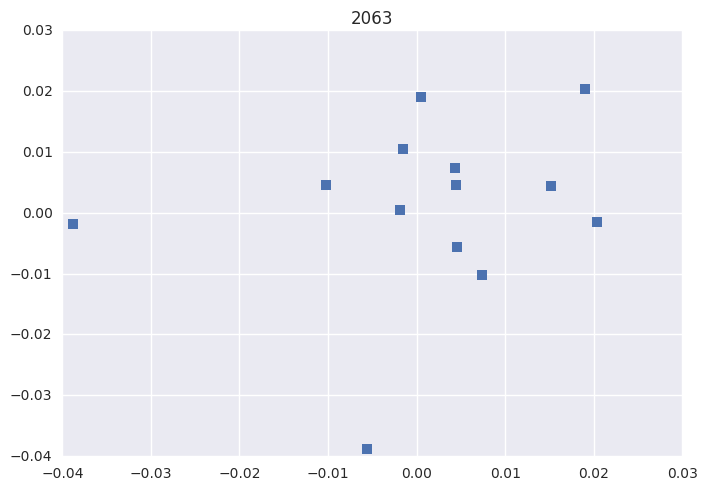

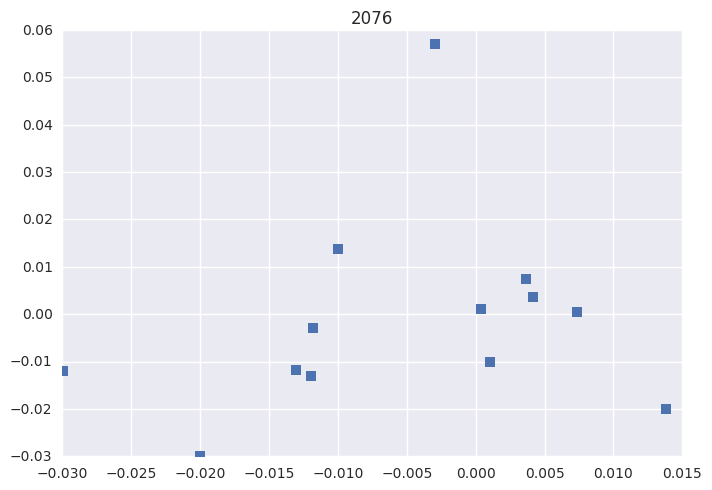

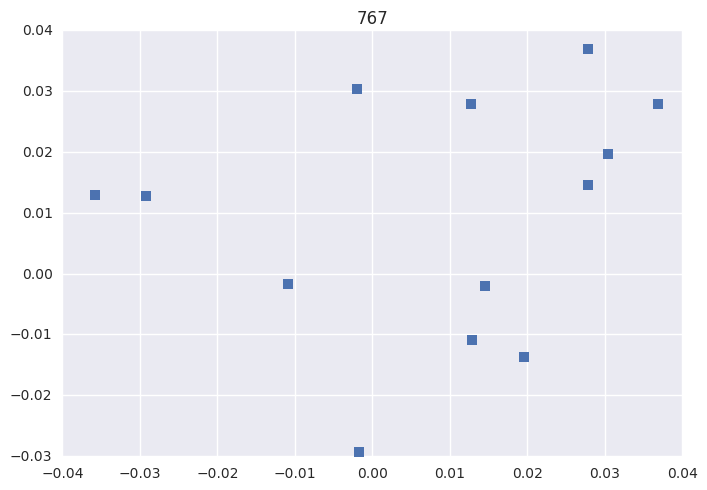

In [12]:
lags = range(1, 15)
for c in list(aCorrs.id)[:10]:
    plt.figure()
    plt.plot(list(df2[c])[:-1], list(df2[c])[1:], 's')
    plt.title(str(c))

In [13]:
cols = [ c for c in df2.columns if str(c) != 'timestamp']
corrs = df2[cols].corr()

In [14]:
corrs

id,0,6,7,10,11,12,13,14,15,16,...,2146,2148,2149,2150,2151,2152,2154,2155,2156,2158
id,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.102534,0.108336,NaN,0.031151,0.114480,0.016336,-0.196191,0.024709,0.081858,...,-0.003411,0.128721,0.033453,-0.038089,-0.037173,NaN,0.104009,-0.021401,0.008002,-0.037209
6,0.102534,1.000000,-0.140003,NaN,0.009020,0.002871,-0.227533,-0.137460,-0.085871,0.234733,...,0.051259,-0.108796,0.007309,-0.128823,-0.070850,NaN,-0.078380,-0.139317,-0.184120,0.024058
7,0.108336,-0.140003,1.000000,NaN,0.058168,0.081693,0.276233,0.228611,0.150159,-0.034365,...,0.006617,0.095824,0.052749,0.104634,0.086240,NaN,0.132496,0.107855,0.142217,-0.238654
10,NaN,NaN,NaN,1.000000,-0.068471,0.147175,NaN,NaN,NaN,0.154165,...,-0.050873,0.090574,0.149842,NaN,0.014080,-0.057743,0.179047,0.165043,0.043707,NaN
11,0.031151,0.009020,0.058168,-0.068471,1.000000,0.097148,-0.034862,-0.062431,-0.055078,-0.047945,...,0.049713,0.056425,-0.023700,-0.049288,-0.057668,0.120011,0.053897,-0.080568,-0.027360,-0.093253
12,0.114480,0.002871,0.081693,0.147175,0.097148,1.000000,0.010198,-0.105425,0.021633,-0.012569,...,0.002436,0.085998,0.049196,-0.002852,0.033722,-0.038690,0.119720,-0.046522,0.031547,-0.129288
13,0.016336,-0.227533,0.276233,NaN,-0.034862,0.010198,1.000000,0.332847,0.286158,-0.072395,...,0.030466,0.076818,-0.004097,0.388598,0.132891,NaN,0.043707,0.342068,0.408164,0.202839
14,-0.196191,-0.137460,0.228611,NaN,-0.062431,-0.105425,0.332847,1.000000,0.324523,-0.039474,...,0.049178,-0.042721,-0.014250,0.383772,0.304018,NaN,0.117629,0.116579,0.366878,0.062677
15,0.024709,-0.085871,0.150159,NaN,-0.055078,0.021633,0.286158,0.324523,1.000000,-0.020626,...,0.078548,0.052434,-0.033410,0.168817,0.162705,NaN,0.084793,0.177238,0.262069,-0.110144


In [15]:
temp = np.where(np.triu(corrs) < -0.9)
temp = [sorted(a) for a in zip(temp[0], temp[1]) if a[0]!=a[1]]

Lets plot the first few that are highly correlated ...

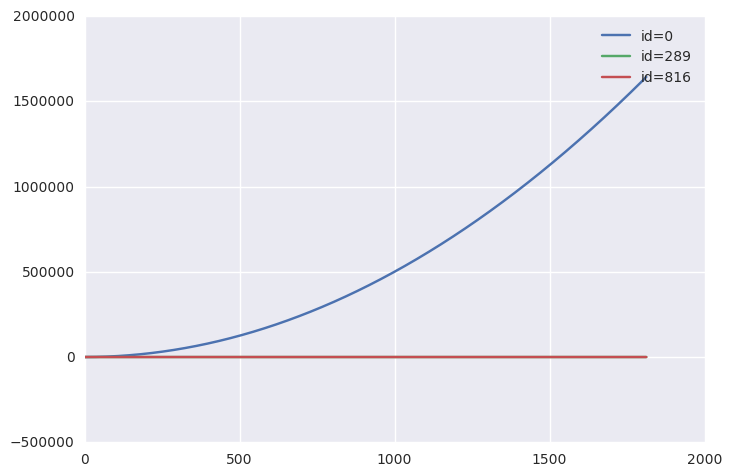

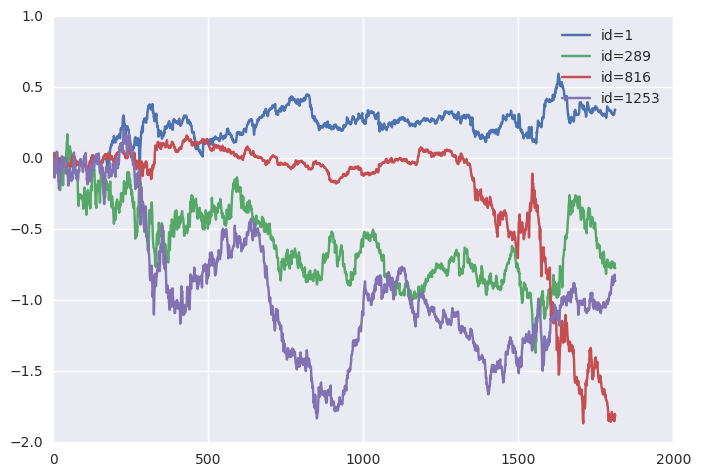

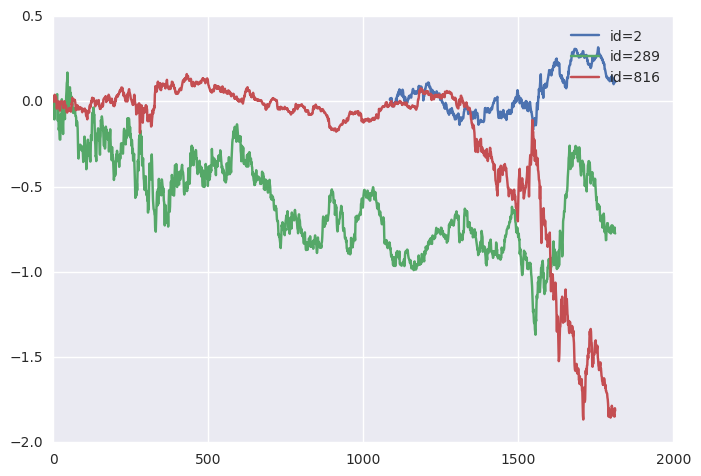

In [16]:
prevId = -1
for i, (a, b) in enumerate(temp):
    
    if a != prevId:
        plt.figure()
        prevId = a
        plt.plot(np.cumsum(df2.ix[:, a]), label='id=%d'%a)
    plt.plot(np.cumsum(df2.ix[:, b]), label='id=%d'%b)
    plt.legend()
    
    if i > 5: break
    

In [17]:
list(df.columns)

['id',
 'timestamp',
 'derived_0',
 'derived_1',
 'derived_2',
 'derived_3',
 'derived_4',
 'fundamental_0',
 'fundamental_1',
 'fundamental_2',
 'fundamental_3',
 'fundamental_5',
 'fundamental_6',
 'fundamental_7',
 'fundamental_8',
 'fundamental_9',
 'fundamental_10',
 'fundamental_11',
 'fundamental_12',
 'fundamental_13',
 'fundamental_14',
 'fundamental_15',
 'fundamental_16',
 'fundamental_17',
 'fundamental_18',
 'fundamental_19',
 'fundamental_20',
 'fundamental_21',
 'fundamental_22',
 'fundamental_23',
 'fundamental_24',
 'fundamental_25',
 'fundamental_26',
 'fundamental_27',
 'fundamental_28',
 'fundamental_29',
 'fundamental_30',
 'fundamental_31',
 'fundamental_32',
 'fundamental_33',
 'fundamental_34',
 'fundamental_35',
 'fundamental_36',
 'fundamental_37',
 'fundamental_38',
 'fundamental_39',
 'fundamental_40',
 'fundamental_41',
 'fundamental_42',
 'fundamental_43',
 'fundamental_44',
 'fundamental_45',
 'fundamental_46',
 'fundamental_47',
 'fundamental_48',
 'fund

It appears that the portfolio is maintained by some form of advanced "pairs trading" platform. We are supposed to be predicting the result of the *result* of the entire system. 

Because of the "hedging strategy" that it is applying, I believe that the cumsum of the `y` variable over time is so fairly constant. If we can figure out that, we should be able to do something interesting. 

The problem just got infinitely more challenging!